## Standard Brownian Motion Explained

A standard brownian motion, also known as the weiner process, is a random process **X**={X<sub>t</sub> : *t* $\in$ [0, $ \infty $)}



References: 
1. https://stats.libretexts.org/Bookshelves/Probability_Theory/Probability_Mathematical_Statistics_and_Stochastic_Processes_(Siegrist)/18%3A_Brownian_Motion/18.01%3A_Standard_Brownian_Motion
2. https://medium.com/@AddisenKing/simulating-stock-price-movements-with-brownian-motion-b4a49888cceb



## Math behind Drift and Volatility 

## Coding for Stock Prices

A lot of help taken from the following resources!

References: 
1. https://medium.com/nerd-for-tech/riding-the-waves-of-randomness-using-brownian-motion-for-stock-price-simulations-in-python-2a7dcdd7d9b9
2. https://medium.com/@AddisenKing/simulating-stock-price-movements-with-brownian-motion-b4a49888cceb
3. https://medium.com/analytics-vidhya/monte-carlo-simulations-for-predicting-stock-prices-python-a64f53585662
4. https://medium.com/@kasperjuunge/yfinance-10-ways-to-get-stock-data-with-python-6677f49e8282

In [1]:
!pip install pandas-datareader yfinance -qqq

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import yfinance as yf

In [3]:
# Constant Values 
TICKER = "AAPL"
START_DATE = "2022-11-01"
END_DATE = "2024-05-31"
END_PREDICTION_DATE = "2024-11-20"
TARGET_VARIABLE = "Adj Close" # choose from "Adj Close", "Close", "High", "Low", "Open", and "Volume"
DAYS_TO_PREDICT = 120 # Days into the future that we want to predict
DAYS_BEFORE = [365, 120, 60, 30, 14] # Days from the past to be used
NUM_SIMULATIONS = 1000 # Number of monte-carlo simulations

In [4]:
# Getting information about the company
company = yf.Ticker(TICKER)
# company.info

In [5]:
data = yf.download(TICKER, start=START_DATE, end=END_DATE)
prediction_data = yf.download(TICKER, start=END_DATE, end=END_PREDICTION_DATE) # the dates give exactly 14 days for real life value

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
len(data)

396

In [7]:
prediction_data_df = pd.DataFrame()
prediction_data_df[TARGET_VARIABLE] = prediction_data[TARGET_VARIABLE]
len(prediction_data_df)

120

Text(0.5, 1.0, 'Adjusted Close Price Stock Value AAPL')

<Figure size 1500x800 with 0 Axes>

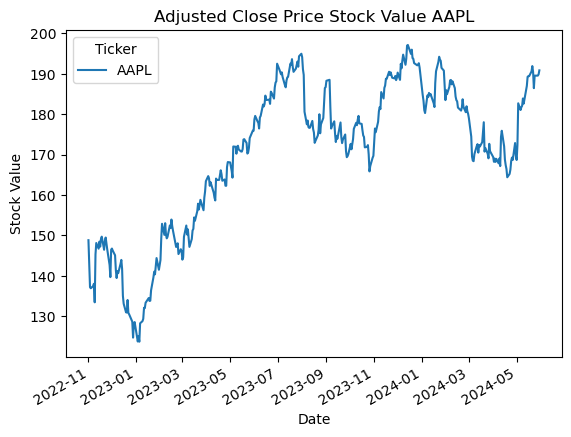

In [8]:
plt.figure(figsize=(15,8))
data[TARGET_VARIABLE].plot()
plt.ylabel("Stock Value")
plt.title("Adjusted Close Price Stock Value " + str(TICKER))

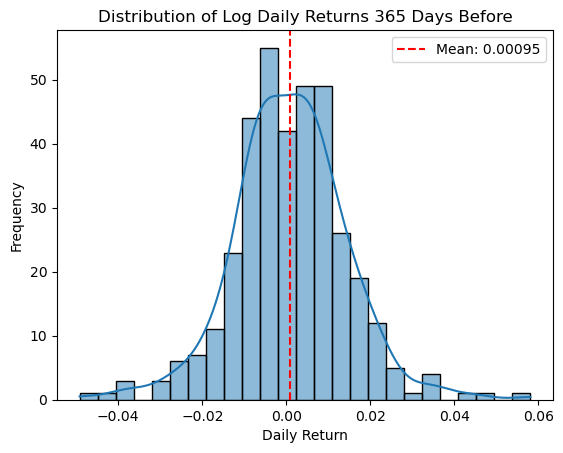

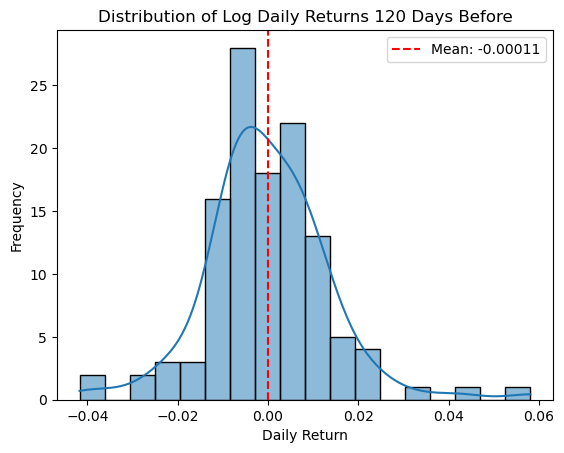

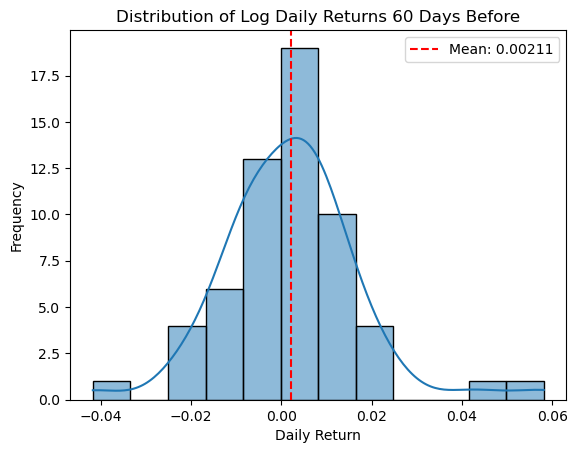

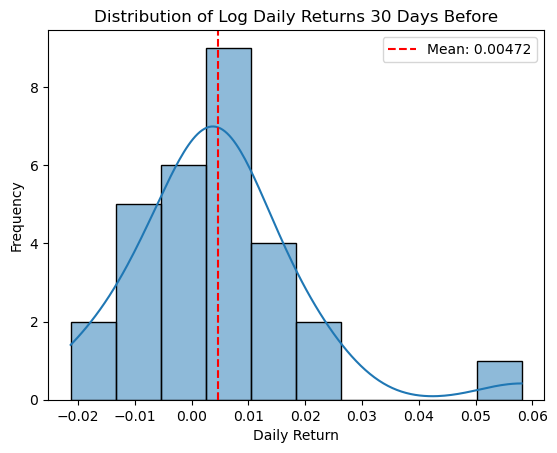

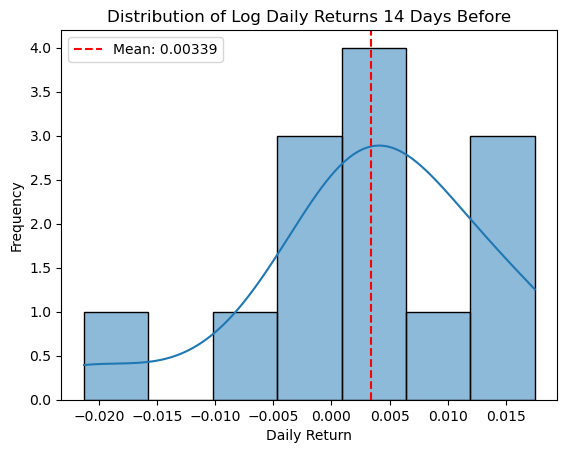

In [9]:
for days_before in DAYS_BEFORE:

    log_return = np.log(1 + data[TARGET_VARIABLE].iloc[-days_before:].pct_change())
    #Plot
    sns.histplot(log_return.iloc[1:], kde=True)
    plt.xlabel("Daily Return")
    plt.ylabel("Frequency")
    plt.axvline(x=log_return.mean().values, linestyle="--", color='r', label='Mean: {0:.5f}'.format(log_return.mean().values[0]))
    plt.title("Distribution of Log Daily Returns "+ str(days_before) + " Days Before")
    plt.legend()
    plt.show()

    

## Method 1: 

Determine mu and sigma using the following:

```
START_DATE = "2022-11-01"
END_DATE = "2024-05-31"
END_PREDICTION_DATE = "2024-11-20"

ST = S0 * np.exp((u - 0.5 * sigma**2) * T + sigma * Z * np.sqrt(T))
```


### Finding the drift, volatility 

In [10]:
log_return = np.log(1 + data[TARGET_VARIABLE].pct_change())

# Calculating drift
u = log_return.mean()
var = log_return.var()
drift = u - (0.5*var)


# Calculating volatility
sigma = log_return.std()

print("Mean is: ", u)
print("Sigma is: ", sigma)

Mean is:  Ticker
AAPL    0.00063
dtype: float64
Sigma is:  Ticker
AAPL    0.014836
dtype: float64


### Monte Carlo Simulations 

In [11]:
def simulate_MC(S0, u, sigma, NUM_SIMULATIONS, T):
    Z = np.random.normal(0, 1, NUM_SIMULATIONS) #days, trials
    drift = (u - 0.5 * sigma**2) * T
    volatility =  Z * sigma * np.sqrt(T)
    ST = S0 * np.exp(drift+volatility) 
    return ST.mean()

predicted_variables = []

for days_before in DAYS_BEFORE:
    S0 = data[TARGET_VARIABLE].iloc[-days_before].values
    
    print("Date   : ",  data.index[-days_before])
    print("Days Before: ", days_before)

    log_return = np.log(1 + data[TARGET_VARIABLE].iloc[-days_before:].pct_change())

    # Calculating drift
    u = log_return.mean()
    var = log_return.var()
    drift = u - (0.5*var)
    
    
    # Calculating volatility
    sigma = log_return.std()
    print("Initial Stock Price: %0.5f" % S0[0])
    print("Mean is:  %.5f" % u.values[0])
    print("Sigma is: %.5f" %sigma.values[0])
    print("0.5sigma^2: %0.10f" % (0.5*sigma.values[0]**2))
    print("-------------------------")

    prediction_values_method_1 = []
    
    for i in range(DAYS_TO_PREDICT):
        prediction_values_method_1.append(simulate_MC(S0, u.values, sigma.values, NUM_SIMULATIONS, i+1))
    
    
    prediction_data_df['Pred Adj Close Method 1: ' + str(days_before)+' Days Before'] = prediction_values_method_1
    predicted_variables.append('Pred Adj Close Method 1: ' + str(days_before)+' Days Before')

Date   :  2022-12-15 00:00:00+00:00
Days Before:  365
Initial Stock Price: 135.07951
Mean is:  0.00095
Sigma is: 0.01343
0.5sigma^2: 0.0000901653
-------------------------
Date   :  2023-12-07 00:00:00+00:00
Days Before:  120
Initial Stock Price: 193.32291
Mean is:  -0.00011
Sigma is: 0.01359
0.5sigma^2: 0.0000923771
-------------------------
Date   :  2024-03-06 00:00:00+00:00
Days Before:  60
Initial Stock Price: 168.51025
Mean is:  0.00211
Sigma is: 0.01511
0.5sigma^2: 0.0001142307
-------------------------
Date   :  2024-04-18 00:00:00+00:00
Days Before:  30
Initial Stock Price: 166.43774
Mean is:  0.00472
Sigma is: 0.01492
0.5sigma^2: 0.0001112811
-------------------------
Date   :  2024-05-10 00:00:00+00:00
Days Before:  14
Initial Stock Price: 182.63744
Mean is:  0.00339
Sigma is: 0.01016
0.5sigma^2: 0.0000515789
-------------------------


### Plotting the mean for the next 4 months

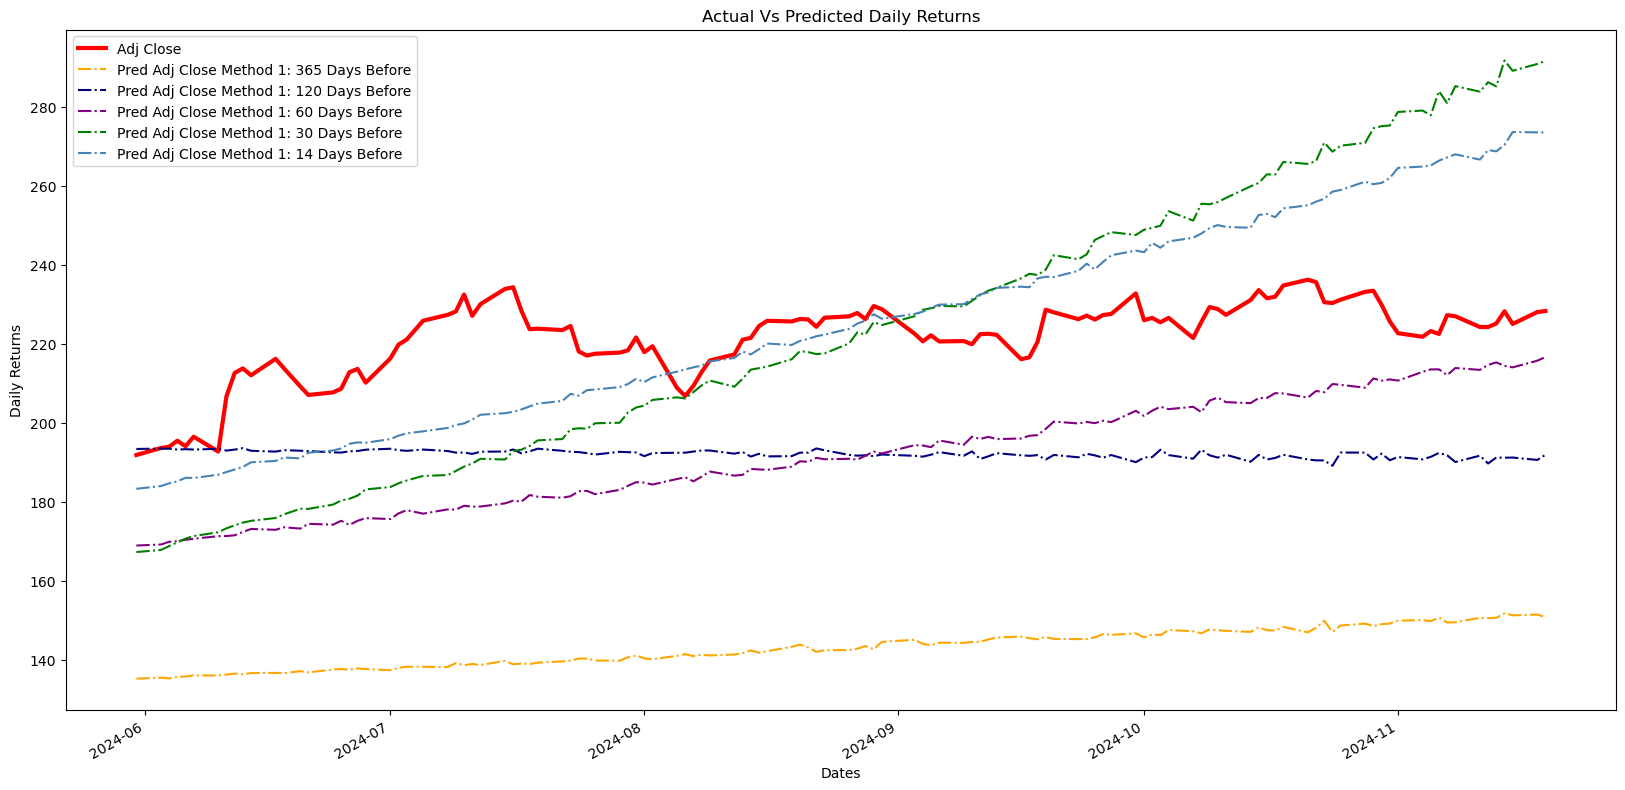

In [12]:
plt.figure(figsize=(20,10))
colors = ['orange','navy','purple','green', 'steelblue', 'lightblue', 'violet']
prediction_data_df[TARGET_VARIABLE].plot(color="red", linewidth=3)
for idx, predicted_variable in enumerate(predicted_variables):
    prediction_data_df[predicted_variable].plot(linestyle="-.", color=colors[idx])
plt.xlabel("Dates")
plt.ylabel("Daily Returns")
plt.title("Actual Vs Predicted Daily Returns")
plt.legend()

In [13]:
log_return = np.log(1 + data[TARGET_VARIABLE].pct_change()) #percentage change from the day before
log_return.head(10)

Ticker,AAPL
Date,
2022-11-01 00:00:00+00:00,NaN
2022-11-02 00:00:00+00:00,-0.038019
2022-11-03 00:00:00+00:00,-0.043330
2022-11-04 00:00:00+00:00,-0.001949
2022-11-07 00:00:00+00:00,0.003895
2022-11-08 00:00:00+00:00,0.004166
2022-11-09 00:00:00+00:00,-0.033753
2022-11-10 00:00:00+00:00,0.085236
2022-11-11 00:00:00+00:00,0.019085


In [14]:
def calculate_next_day_value(next_day, days_before):

    if next_day-days_before<=0:
        past_values = log_return[0 : next_day] # range does not count the next day value
        
    else:
        past_values = log_return[next_day-days_before : next_day]

        
    u = past_values.mean()
    var = past_values.var()
    drift = u - (0.5*var)
    
    volatility = past_values.std()

    Z = np.random.normal(0, 1, NUM_SIMULATIONS)
    next_day_return = np.exp(drift.values + volatility.values * Z)
    next_day_val = next_day_return*(data[TARGET_VARIABLE].iloc[next_day-1].values)
    
    return next_day_val.mean()

# TODO: find a more efficient way of doing this
predicted_values = [np.NaN]
for i in range(1, len(data)):
    # predicting i which is the next_day
    predicted_values.append(calculate_next_day_value(i, DAYS_BEFORE))


projection_df = pd.DataFrame()
projection_df[TARGET_VARIABLE] = data[TARGET_VARIABLE].iloc[:]
projection_df['Predicted Adj Close'] = predicted_values

TypeError: unsupported operand type(s) for -: 'int' and 'list'

In [ ]:
def calculate_next_day_value(next_day, days_before):

    if next_day-days_before<=0:
        past_values = log_return[0 : next_day] # range does not count the next day value
        
    else:
        past_values = log_return[next_day-days_before : next_day]

        
    u = past_values.mean()
    var = past_values.var()
    drift = u - (0.5*var)
    
    volatility = past_values.std()

    Z = np.random.normal(0, 1, NUM_SIMULATIONS)
    next_day_return = np.exp(drift.values + volatility.values * Z)
    next_day_val = next_day_return*(data[TARGET_VARIABLE].iloc[next_day-1].values)
    
    return next_day_val.mean()

# TODO: find a more efficient way of doing this

projection_df = pd.DataFrame()
projection_df[TARGET_VARIABLE] = data[TARGET_VARIABLE].iloc[:]

for days_before in [5, 10, 20]:
    predicted_values = [np.NaN]
    for i in range(1, len(data)):
        # predicting i which is the next_day
        predicted_values.append(calculate_next_day_value(i, days_before))
    
    
    
    projection_df['Predicted Adj Close_'+str(days_before)] = predicted_values

In [ ]:
projection_df

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=projection_df.iloc[-50:], x="Date", y = TARGET_VARIABLE, label="Actual Value")
sns.lineplot(data=projection_df.iloc[-50:], x='Date', y = "Predicted Adj Close_5", linestyle="--", label="Predicted Value using 5 days prior data")
sns.lineplot(data=projection_df.iloc[-50:], x='Date', y = "Predicted Adj Close_10", linestyle="--", label="Predicted Value using 10 days prior data")
sns.lineplot(data=projection_df.iloc[-50:], x='Date', y = "Predicted Adj Close_20", linestyle="--", label="Predicted Value using 20 days prior data")
plt.ylabel("Stock Value")
plt.title("Actual Stock Value and Predicted Stock Value for " + str(TICKER))
plt.legend()

## Predicting without using past 50 days real data

Currently, the log returns for the past few days are used from real-life data. Here, we attempt to push beyond and use the predicted values to calculate both log return and the new value

In [15]:
prediction_data_df = pd.DataFrame()
prediction_data_df[TARGET_VARIABLE] = prediction_data[TARGET_VARIABLE]

def simulate_MC(S0, u, sigma, NUM_SIMULATIONS, T=1):
    Z = np.random.normal(0, 1, NUM_SIMULATIONS) #days, trials
    drift = (u - 0.5 * sigma**2) * T
    volatility =  Z * sigma * np.sqrt(T)
    ST = S0 * np.exp(drift+volatility) 
    return ST.mean()

predicted_variables = []

for days_before in DAYS_BEFORE:

    predicted_values = data[TARGET_VARIABLE].iloc[-days_before:].values.flatten()

    window_past_days = predicted_values[-days_before:]
        
    daily_returns = np.diff(window_past_days)/window_past_days[:-1]
    log_return = np.log(1 + daily_returns)
    
    # Calculating drift
    u = log_return.mean()    
    
    # Calculating volatility
    sigma = log_return.std()

    print("No. of days before : ", days_before)
    print("The original mean  : ", u)
    print("The original sigma : ", sigma)
    print("------------------------")
    
    
    for i in range(DAYS_TO_PREDICT):
    
        window_past_days = predicted_values[-days_before:]
        
        daily_returns = np.diff(window_past_days)/window_past_days[:-1]
        log_return = np.log(1 + daily_returns)
        
        # Calculating drift
        u = log_return.mean()
        var = log_return.var()
        drift = u - (0.5*var)
        
        
        # Calculating volatility
        sigma = log_return.std()
    
        predicted_value = simulate_MC(predicted_values[-1], u, sigma, NUM_SIMULATIONS, T=1)
    
        predicted_values = np.append(predicted_values, predicted_value)
    
    prediction_data_df['Pred Adj Close Method 2: ' + str(days_before) + ' Days Before' ] = predicted_values[-DAYS_TO_PREDICT:]
    predicted_variables.append('Pred Adj Close Method 2: ' + str(days_before)+' Days Before')

No. of days before :  365
The original mean  :  0.0009496444719582031
The original sigma :  0.013410263025201787
------------------------
No. of days before :  120
The original mean  :  -0.00010779579317803375
The original sigma :  0.013535199517800436
------------------------
No. of days before :  60
The original mean  :  0.002110806442695266
The original sigma :  0.014986302747975017
------------------------
No. of days before :  30
The original mean  :  0.004721132816178389
The original sigma :  0.014659044648484608
------------------------
No. of days before :  14
The original mean  :  0.0033870168462760996
The original sigma :  0.009758206848868913
------------------------


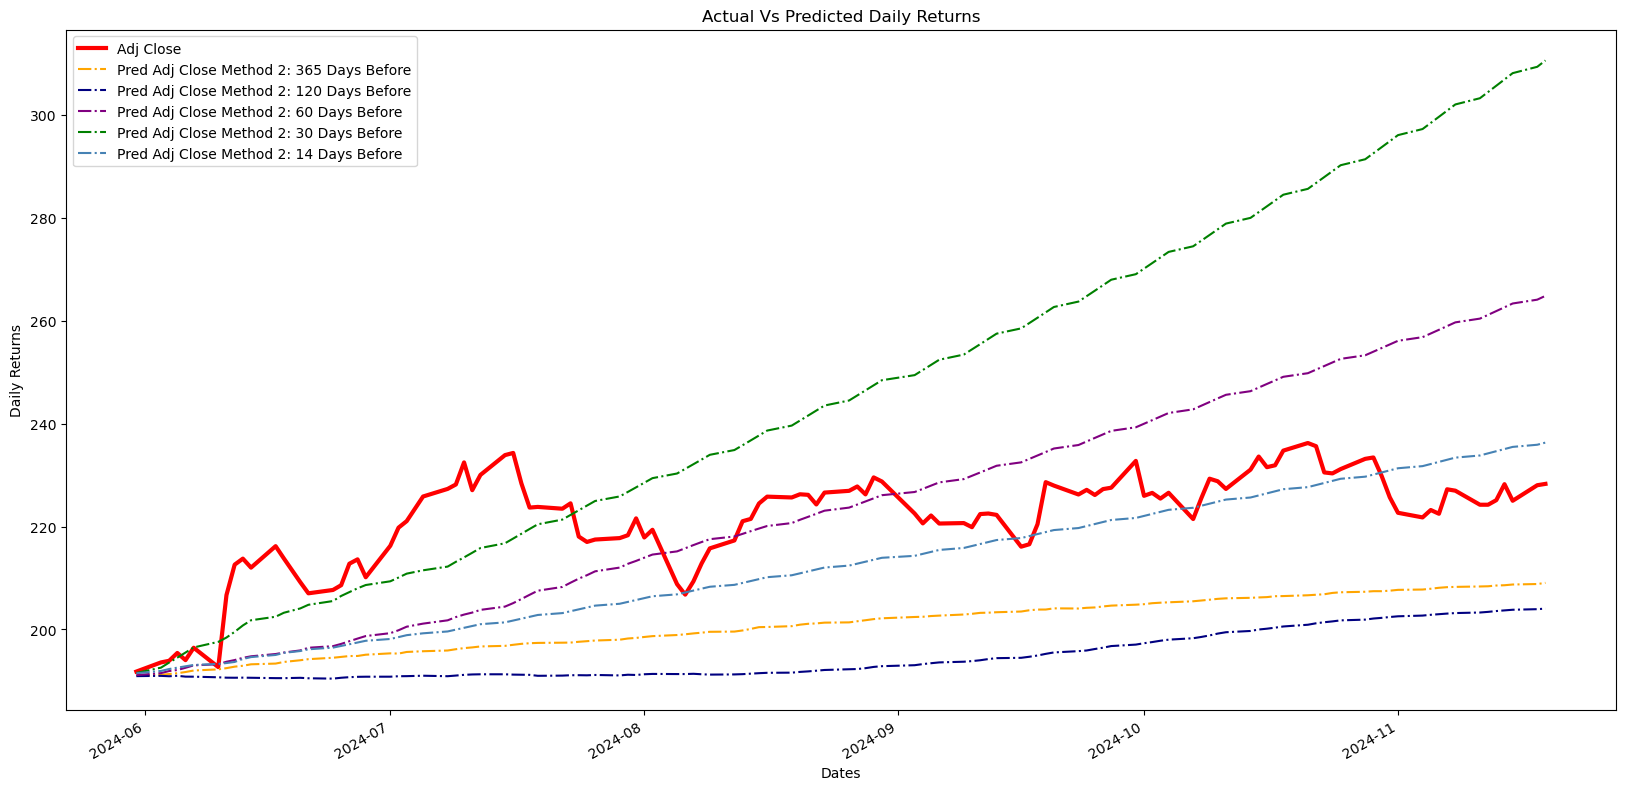

In [16]:
plt.figure(figsize=(20,10))
colors = ['orange','navy','purple','green', 'steelblue']
prediction_data_df[TARGET_VARIABLE].plot(color="red", linewidth=3)
for idx, predicted_variable in enumerate(predicted_variables):
    prediction_data_df[predicted_variable].plot(linestyle="-.", color=colors[idx])
plt.xlabel("Dates")
plt.ylabel("Daily Returns")
plt.title("Actual Vs Predicted Daily Returns")
plt.legend()